# Is Fandango (still) Floating Ratings?

This guidede project is part of the Data Analyst path available on [Dataquest.io](https://dataquest.io)

In 2015 journalist [Walt Hickey](https://fivethirtyeight.com/contributors/walt-hickey/) published an article [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/). In the article Hickey discovered that [Fandango](https://www.fandango.com) is playing with the ratings and the actuall ratings are smaller than it shows on the website. Since the article was published in 2015 Fandango site has changed their rating system to percentage and is showing Rotten Tomatoes along with the Fandango rating system.

## Current Fandango
<div>
<img src="https://github.com/Pav-Ini/DataQuest/blob/main/13%20Fandago/fandago_01.png?raw=true" width="500"/>
</div>

**Current Reviews Methodology**
<div>
<img src="https://github.com/Pav-Ini/DataQuest/blob/main/13%20Fandago/fandago_02.png?raw=true" width="300"/>
</div>
<br/><br/>
<br/><br/>

## Previous Fandango
<div>
<img src="https://s3.amazonaws.com/dq-content/288/s1gp_fdg_stars.png" width="500"/>
</div>

Hickey found that the actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect. In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars. The data I'm analyzing (used for the 2015 comparison) are from the **following years 2016 and 2017.**

## Datasets
- [Hickey original dataset](https://github.com/fivethirtyeight/data/tree/master/fandango)
- [Dataquest.io dataset](https://github.com/mircealex/Movie_ratings_2016_17)

## 1. Exploring the Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the files as pd.DataFrame
previous = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

In [3]:
# explorig previous dataset - sample of 3
previous.sample(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
48,Fantastic Four (2015),9,20,27,2.5,4.0,3.0,2.7,0.45,1.00,...,2.00,0.5,1.0,1.5,1.5,2.0,421,39838,6288,0.3
120,The Wolfpack (2015),84,73,75,7.0,7.1,3.5,3.4,4.20,3.65,...,3.55,4.0,3.5,4.0,3.5,3.5,8,1488,66,0.1
63,Child 44 (2015),26,44,41,5.3,6.4,4.0,3.7,1.30,2.20,...,3.20,1.5,2.0,2.0,2.5,3.0,73,19220,308,0.3


In [4]:
# explorig after dataset - sample of 3
after.sample(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
64,Gold,2016,49,6.6,42,45,3.5,2.45,3.3,2.10,2.25,2.5,3.5,2.0,2.0
176,The Founder,2016,66,7.2,83,81,4.0,3.30,3.6,4.15,4.05,3.5,3.5,4.0,4.0
88,Keeping Up with the Joneses,2016,34,5.8,19,38,3.5,1.70,2.9,0.95,1.90,1.5,3.0,1.0,2.0


In [5]:
# selecting working columns for both 
fandago_previous = previous.copy()[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandago_after = after.copy()[['movie', 'year', 'fandango']]

In [6]:
# explore fandago_previous
fandago_previous.sample(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
135,The Lazarus Effect (2015),3.0,3.0,1651,0.0
73,Furious 7 (2015),5.0,4.8,33538,0.2
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0
55,Black or White (2015),4.5,4.2,1862,0.3
84,Sinister 2 (2015),3.5,3.3,973,0.2


In [7]:
# explore fandago_after
fandago_after.sample(5)

,movie,year,fandango
16,Bad Santa 2,2016,3.5
154,T2 Trainspotting,2017,4.5
89,Kickboxer,2016,4.0
6,A Street Cat Named Bob,2016,4.5
23,Bitter Harvest,2017,4.5


The goal of this analysis is to determine whether the Fandango is still inflating the reviews on it's site or not. The population for this analysis are movies in the Fandango database - the website.

Hickey's `README.md` [document](https://github.com/fivethirtyeight/data/tree/master/fandango#readme) specifies the dataset:
- at least 30 fan reviews on Fandango
- the data from Fandango was pulled on Aug. 24, 2015

Dataquest.io `README.md` [document](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) specification:
- ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017

As the two authors have different data sampling approaches, let's change the original analysis goal, so we can compare both datasets. The **new goal** is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

## 2. Isolating the Sample
To move forward with the analysis we need two datasets.
- All Fandango's ratings for popular movies released in 2015
- All Fandango's ratings for popular movies released in 2016

To determine what is a *popular* movie, we use Hickeys metrics: movies with 30 or more reviews. Unfortunally the second dataset does not contain data about the number of ratings. Let's sample some data and cross-check with the current Fandango database to see how many ratings the movies have. The current situp does not feature the number of ratings, but when opening the source code the number of ratings can be found under the variable `ratingCount`. Also this method is not accurate, because looking at the Fandango site now (2021), the number of ratings went up, compared to 2016.

**Current Source Code**
<div>
<img src="https://github.com/Pav-Ini/DataQuest/blob/main/13%20Fandago/fandago_03.png?raw=true" width="700"/>
</div>

### 2.1 Check if Both Samples Contain Popular Movies
That is, check whether all - or at least most - sample points are movies with over 30 fan ratings on Fandango's website.

In [8]:
# checking the fandago_previous

(fandago_previous["Fandango_votes"] <= 30).sum()

0

Hickey's dataset does not contain any movies with rating 30 or smaller. 👍
The second dataset however does not have the no. rating colum. Let's crate a sample and cross-check with the Fandago website.

In [9]:
fandago_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Crossechecking with the website we can observe following:
|Movie|`ratingCount`|
|------|----------|
|Mechanic: Resurrection|25654|
|Warcraft|31730|
|Max Steel|6854|
|Me Before You|30777|
|Fantastic Beasts and Where to Find Them|88187|
|Cell|3868|
|Genius|11|
|Sully|48658|
|A Hologram for the King|10253|
|Captain America: Civil War|80903|

From the sample we can tell that 90% of the data are meeting our criteria of popular movies.

## 2.2 Isolating movies from 2015 and 2016

In [10]:
# extracting the year film was made and saving it as a new colum
fandago_previous["year"] = fandago_previous["FILM"].str[-5:-1]
fandago_previous["year"].value_counts()

2015    129
2014     17
Name: year, dtype: int64

From the total of 146 movies in the Hickey's dataset, 17 were made in 2014. Let's extract only those made in 2015.

In [11]:
fandago_2015 = fandago_previous[fandago_previous["year"] == "2015"].copy()
fandago_2015.shape

(129, 6)

In [12]:
fandago_after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

From the total number of 214 movies, 23 were made in 2017. Let's proceed only with movies made in 2016.

In [13]:
fandago_2016 = fandago_after[fandago_after["year"] == 2016].copy()
fandago_2016.shape

(191, 3)

## 3. Comparing Shapes and Distributions for 2015 and 2016

### 3.1 Kernel density plots

Creating kernel density plots to compare rating distribution.

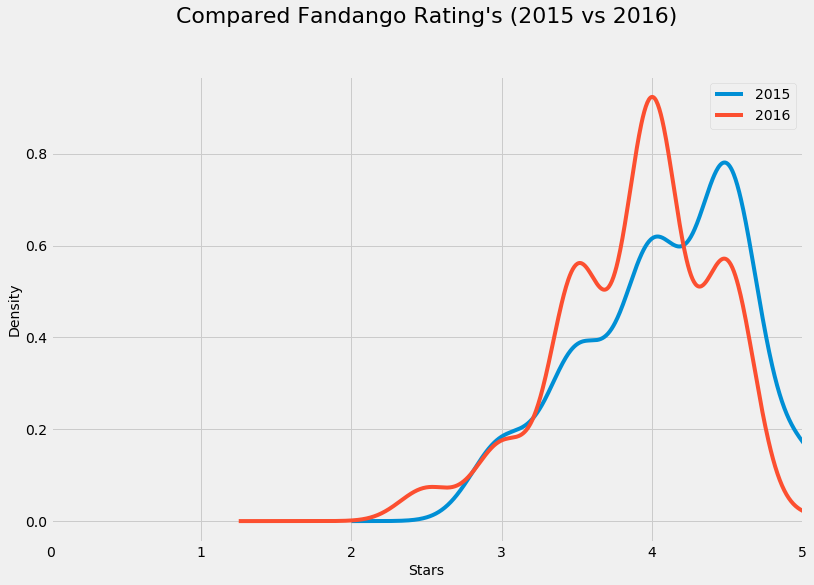

In [14]:
plt.style.use("fivethirtyeight")

fandago_2015["Fandango_Stars"].plot.kde(label="2015", legend = True, figsize=(12,8))
fandago_2016["fandango"].plot.kde(label="2016", legend=True)

plt.title("Compared Fandango Rating\'s (2015 vs 2016)", y=1.1, size=22)
plt.xlabel("Stars", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xlim(0,5)
plt.show()

Both charts are left skewed, meaning that in both years the majority of ratings were positive. However, in 2015 the peak is at 4,5 stars, with 80% of the total amount of rated movies. In 2016 the rating shifted to 4 stars. **Movies in 2016 were receiving slightly worse rating.**

### 3.2 Frequency distribuitions
To have a closer look on the rating distribution let's generate frequency tables for each year. Because both datasets have different number of muvies, let's normalize the calucaltion and show the totals in percentages.

In [15]:
print("2015 Distribution Table", "\n", "-" * 20)
fandago_2015["Fandango_Stars"].value_counts(normalize=True).sort_index() * 100

2015 Distribution Table 
 --------------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [16]:
print("2016 Distribution Table", "\n", "-" * 20)
fandago_2016["fandango"].value_counts(normalize=True).sort_index() * 100

2016 Distribution Table 
 --------------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Because both frequency tables are rather small we can simply eyeball the results and confirm that 2016 ratings are "worse" than 2015. In 2016 the rating of 2.5 stars is present. In 2015 the lowest star rating is 3. In 2015 there were almost 7% films rated with 5 stars, in 2016 it was only 0.5%. Majority of the ratings shifted from 4.5 to 4 stars.

## 4. Direction of Change
Let's compute a couple of summary statistics to get a more precise picture about the direction of the change. In what follows, we'll compute the **mean, the median, and the mode** for both distributions and then use a bar graph to plot the values.

In [17]:
# computing mean for 2015 & 2016
mean_2015 = fandago_2015["Fandango_Stars"].mean()
mean_2016 = fandago_2016["fandango"].mean()

# computing median for 2015 & 2016
median_2015 = fandago_2015["Fandango_Stars"].median()
median_2016 = fandago_2016["fandango"].median()

# computing mode for 2015 & 2016
mode_2015 = fandago_2015["Fandango_Stars"].mode()[0] # to get only the mode value
mode_2016 = fandago_2016["fandango"].mode()[0]

summary = pd.DataFrame()
summary["2015"] = [mean_2015, median_2015, mode_2015]
summary["2016"] = [mean_2016, median_2016, mode_2016]
summary["Description"] = ["central value", "middle value", "most often value"]
summary.index = ["mean", "median", "mode"]

In [18]:
summary

,2015,2016,Description
mean,4.085271,3.887435,central value
median,4.000000,4.000000,middle value
mode,4.500000,4.000000,most often value


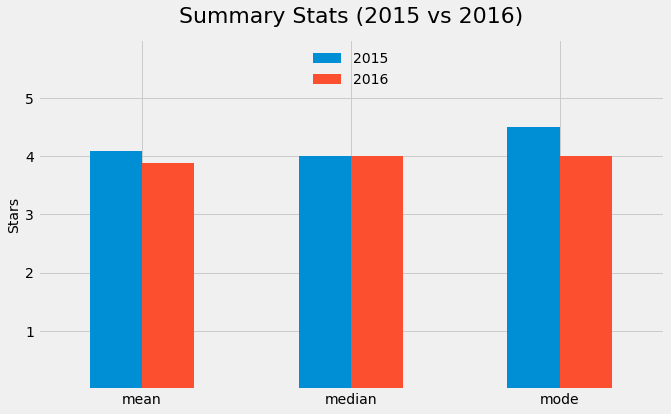

In [19]:
summary.plot.bar( legend = True, figsize=(10,6), rot=0)

plt.title("Summary Stats (2015 vs 2016)", y=1.03, size=22)
plt.ylabel("Stars", fontsize=14)
plt.yticks([1,2,3,4,5,6],[1,2,3,4,5])
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [20]:
print("Mean shift" + "\n" + "-" * 10)
print(summary.loc["mean"][0] - summary.loc["mean"][1])
print("\n")

print("Mean difference relative to 2015" + "\n" + "-" * 10)
print((summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0] * 100)

Mean shift
----------
0.19783676285563567


Mean difference relative to 2015
----------
4.842683568951993


From the graph above we can read that the most common value (mode) dropped from 4.5 to 4 stars. The median (average) rating remains the same, but the mean (central value) is slighlty lower in 2016. The mean rating was lower in 2016 with approximately 0.2, and the mean drop of almost 5% relative to the mean rating in 2015.

## 5. Conclusion
There is a slight difference between 2015 and 2016 Fandango ratigns. The popular movies in 2016 received slightly worse ratings than in 2015.

**Note** I have misread the Fandango and created all variables as `fandago`, cuz you know. Then it was too late (I was too lazy), to fix it. So here you go 💁

## Sources
|Picture Name|Source|Link|
|--------|-------|------|
|Current Fandango|Fandango|https://www.fandango.com/in-the-heights-2021-221894/movie-reviews|
|Current Reviews Methodology|Fandago|https://www.fandango.com/in-the-heights-2021-221894/movie-reviews|
|Previous Fandango|Dataquest.io|https://s3.amazonaws.com/dq-content/288/s1gp_fdg_stars.png|
|Current Source Code|Fandango|view-source:https://www.fandango.com/avengers-endgame-2019-215871/movie-reviews|